# Generalizing to Higher Dimensions

## 6.1 Generalizing our definition of vectors

### 6.1.1 Creating a class for 2D coordinate vectors

In [118]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

In [119]:
v = Vec2(3,4) # Create a new Vec2 called v with x-coordinate 3 and y-coordinate 4.
w = v.add(Vec2(-2,6)) # Add a second Vec2 to v to produce a new Vec2 instance called w, the result is (3,4) + (-2,6) = (1,10).
print(w.x, w.y) # Print the x-coordinate and y-coordinate of w.

1 10


In [120]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
        

In [121]:
v = Vec2(3,4)
w = v.scale(1)
print(w.x, w.y)

3 4


### 6.1.2 Imoroving the Vec2 class

In [122]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):  # The __mul__ and __rmul__ methods define both orders of multiplicaton,so we can multiply vectors by scalars on the left or the right. Mathematically, we consider both orders to mean the same thing.
        return self.scale(scalar)

In [123]:
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

In [124]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):  # The __mul__ and __rmul__ methods define both orders of multiplicaton,so we can multiply vectors by scalars on the left or the right. Mathematically, we consider both orders to mean the same thing.
        return self.scale(scalar)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [125]:
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

Vec2(3.0,4.0)

### 6.1.3 Repeating the process with 3D vectors

In [126]:
class Vec3():
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __add__(self,other):
        return self.add(other)
    def __mul__(self,scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x,self.y,self.z)
        

In [127]:
2.0*(Vec3(1,0,0)+Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [128]:
def average(v1,v2):
    return 0.5 * v1 + 0.5 * v2

In [129]:
average(Vec2(9.0,1.0), Vec2(8.0, 6.0))

Vec2(8.5,3.5)

In [130]:
average(Vec3(1,2,3),Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

### 6.1.4 Building a Vector base class

In [131]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass

In [132]:
# won't work
# v = Vector()

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-21-b3a54e32c88a> in <module>
      1 # won't work
----> 2 v = Vector()

TypeError: Can't instantiate abstract class Vector with abstract methods add, scale

In [133]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self, other):
        return self.add(other)

In [134]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [135]:
# give it a subtract method
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self, other):
        return self.add(other)
    
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def subtract(self,other):
        return self.add(-1*other)
    def __sub__(self,other):
        return self.subtract(other)
    

In [136]:
Vec2(1,3) + Vec2(5,1)

Vec2(6,4)

### 6.1.5 Defining vector spaces

### 6.1.6 Unit testing vector space classes

In [137]:
s = -3
u, v = Vec2(42,-10),Vec2(1.5,8)
s * (u+v) == s * u + s * v

True

In [138]:
from random import uniform

def random_scalar():
    return uniform(-10,10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()
#assert a * (u + v) == a * v + a * u



In [139]:
a, u, v

(1.0324256161299559,
 Vec2(3.459781258796715,4.9911657486607695),
 Vec2(-1.0209902015015242,-7.8539468330159075))

In [140]:
a * (u + v), a * u + a * v

(Vec2(2.517870359940214,-2.9556085248605366),
 Vec2(2.517870359940214,-2.955608524860536))

In [141]:
from math import isclose

def approx_equal_vec2(v,w):
    return isclose(v.x, w.x) and isclose(v.y,w.y) # Test whether the x and y components are close (even if not equal)

for _ in range(0,100): # Run the test for 100 different randomly generated scalars and pairs of vectors.
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a * (u + v), a * v + a * u) # Replace a strict equality check with the new function

In [142]:
def test(eq, a, b, u, v, w): # We pass in the equality test function as "eq." This keeps the test function agnostic as to the particular concrete vector implementation being passed in.
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    

In [143]:
for i in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a, b, u, v, w)

### 6.1.7 Exercises

Implement a "subtract" method and overload the "-" operator for Vector class.

In [144]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self, other):
        return self.add(other)
    def substract(self, other):
        return self.add(-1*other)
    def __sub__(self, other):
        return self.subtract(other)

Implement a Vec3 class inheriting from Vector.

In [145]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

**MINI-PROJECT:** Implement a `CoordinateVector` class inheriting from Vector, with an abstract property representing the dimension. This should save repeated work implementing specific coordinate vector `class`; all you should need to do to implement a `Vec6` class should be inheriting from `CoordinateVector` and setting the dimension to 6.

In [146]:
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self,*coordinates):
        self.coordinates = tuple(x for x in coordinates)
    def add(self,other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    def scale(self,scalar):
        return self.__class__(*scale(scalar, self.coordinates))
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

In [147]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [148]:
Vec6(1,2,3,4,5,6) + Vec6(1,2,3,4,5,6)

Vec6(2, 4, 6, 8, 10, 12)

Add a "zero" abstract method to `Vector`, designed to return the zero vector in a given vector space, as well as an implementation for the negation operator. These are useful, because we're required to have a zero vector and negations of any vector in vector space.

In [149]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self, other):
        return self.add(other)
    def substract(self, other):
        return self.add(-1*other)
    def __sub__(self, other):
        return self.subtract(other)
    @classmethod
    @abstractproperty
    def zero():
        pass
    def __neg__(self):
        return self.scale(-1)

In [150]:
class Vec2(Vector):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)
    

Write unit tests to show that the addition and scalar multiplication operations for `Vec3` satisfy the vector space properties.

In [151]:
def random_vec3():
    return Vec3(random_scalar(), random_scalar(),random_scalar())
def approx_equal_vec3(v,w):
    return isclose(v.x, w.x) and isclose(v.y, w.y) and isclose(v.z, w.z)

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3,a,b,u,v,w)

Add unit tests to check that 0+v=v, 0*v=0, and -v+v=0 for any vector v.

In [152]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)

In [153]:
class Vec3(Vector):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __repr__(self):
        return "Vec2({},{},{})".format(self.x, self.y, self.z)
    def zero():
        return Vec2(0,0)

In [154]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(Vec2.zero(), approx_equal_vec2, a,b,u,v,w)

As equality is implemented above for `Vec2` and `Vec3`, it turns out that `Vec2(1,2) == Vec3(1,2,3)` returns True. Python's duck typing is too forgiving for its own good! Fix this by adding a check that classes match before testing vector equality.

In [155]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.y = y
        self.x = x
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self, other):
        return (self.__class__ == other.__class__ and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [156]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    #1
    @abstractproperty #2
    def zero():
        pass
    def __neg__(self): #3
        return self.scale(-1)
    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

In [157]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [158]:
Vec2(1,2)/2

Vec2(0.5,1.0)

## 6.2 Exploring different vector spaces

### 6.2.1 Enumerating all coordinate vector spaces

In [159]:
class Vec1(Vector):
    def __init__(self,x):
        self.x = x
    def add(self,other):
        return Vec1(self.x + other.x)
    def scale(self,scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self,other):
        return self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)
    

In [160]:
Vec1(2) + Vec1(4)

Vec1(6)

In [161]:
3*Vec1(3)

Vec1(9)

In [162]:
class Vec0(Vector):
    def __init__(self):
        pass
    def add(self,other):
        return Vec0()
    def scale(self, scalar):
        return Vec0()
    @classmethod
    def zero(cls):
        return Vec0()
    def __eq__(self, other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return "Vec0()"

In [163]:
-3.14 * Vec0()

Vec0()

In [164]:
Vec0() + Vec0() + Vec0() + Vec0()

Vec0()

### 6.2.2 Identifying vector spaces in the wild

In [165]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

In [166]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12)  #1
    def __init__(self, model_year, mileage, price, posted_datetime, model="(virtual)", source="(virtual)", location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2):
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale(
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self, scalar):
        def scale_date(d):
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [167]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s, input_format).replace(year=2018)

    return dt
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2], car[5], car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [168]:
(cars[0] + cars[1]).__dict__

{'model_year': 4012,
 'mileage': 306000.0,
 'price': 6100.0,
 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

### 6.2.3 Treating functions as vectors

In [169]:
# plotting utility function for functions in this chapter

import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

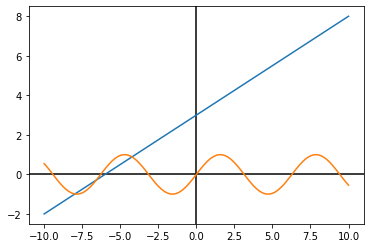

In [170]:
def f(x):
    return 0.5 * x +3
def g(x):
    return sin(x)
plot([f,g],-10,10)

In [171]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

### 6.2.4 Treating matrices as vectors

In [172]:
class Matrix5_by_3(Vector):
    rows = 5 # You need to know the number of rows and columns to be able to construct the zero matrix.
    columns = 3
    def __init__(self,matrix):
        self.matrix = matrix
    def add(self,other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a,b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))
    def scale(self, scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple( # The "zero vector" for 5 x 3 matrices is a 5 x 3 matrix consisting of all zeroes. Adding this to any other 5x3 matrix M will return M.
            tuple(0 for j in range(0, cls.columns))
            for i in range(0, cls.rows)
        ))     

### 6.2.5 Manipulating images with vector operations

In [173]:
from PIL import Image

class ImageVector(Vector):
    size = (300,300) # This class is meant to handle images of fixed size: 300 pixels by 300 pixels.
    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) # The constructor can accept the name of an image file. We create an Image object with PIL, resize it to 300 by 300, and then extract its list of pixels with the getdata() method. Each pixel is a triple consisting of a red, green, and blue value.
            self.pixels = img.getdata()
        except:
            self.pixels = input # We allow the constructor to also accepte a list of pixels directly.
    def image(self):
        img = Image.new('RGB', ImageVector.size) # This method returns the underlying PIL Image, reconstructed from the pixels stored as an attribute on the class. The values must be converted to integers to create a displayable image.
        img.putdata([(int(r), int(g), int(b))
                     for (r,g,b) in self.pixels])
        return img
    def add(self, img2): # Vector addition for images is done by adding the respective red, green, and blue values for each pixel.
        return ImageVector([(r1+r2,g1+g2,b1+b2)
                            for ((r1,g1,b1),(r2,g2,b2))
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): # Scalar multiplication is done by multiplying every red, green, and blue value for every pixel by the given scalar.
        return ImageVector([(scalar*r, scalar*g, scalar*b)
                            for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): # The zero image has zero red, green, or blue content at any pixel.
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0, total_pixels)])
    def _repr_png_(self): # Jupyter notebooks can display PIL Images inline, as long as we pass the implementation of the function _repre_png_ along from the underlying image.
        return self.image()._repr_png_()

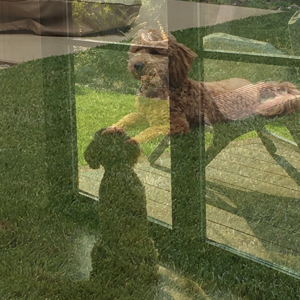

In [174]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [175]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

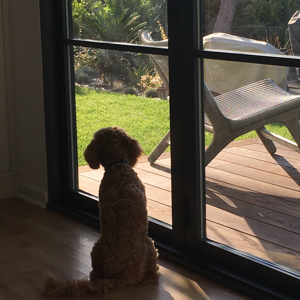

In [176]:
ImageVector("inside.JPG")

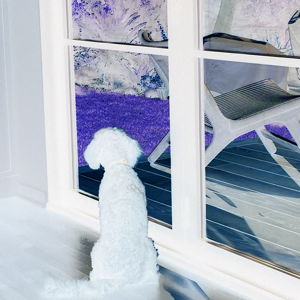

In [177]:
white - ImageVector("inside.JPG")

### 6.2.6 Exercises

Run the vector space unit tests with u, v, and w as floats rather than objects inheriting Vector. This demonstrates that real numbers are indeed vectors.

In [178]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_scalar(), random_scalar(), random_scalar()
    test(0, isclose, a,b,u,v,w)

What is the zero vector for a CarForSale? Implement the CarForSale.zero() function to make it available.

In [179]:
class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12)  #1
    def __init__(self, model_year, mileage, price, posted_datetime, model="(virtual)", source="(virtual)", location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2):
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale(
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self, scalar):
        def scale_date(d):
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)
    

**MINI-PROJECT:** Run the vector space unit tests for `CarForSale` to show its objects form a vector space (ignoring their textual attibutes).

In [180]:
from math import isclose
from random import uniform, random, randint
from datetime import datetime, timedelta

def random_time():
    return CarForSale.retrieved_date - timedelta(days=uniform(0,10))

def approx_equal_time(t1, t2):
    test = datetime.now()
    return isclose((test-t1).total_seconds(), (test-t2).total_seconds())

def random_car():
    return CarForSale(randint(1999,2019), randint(0,250000),
                      270000. * random(), random_time())
    
def approx_equal_car(c1,c2):
    return (isclose(c1.model_year, c2.model_year)
            and isclose(c1.mileage, c2.mileage)
            and isclose(c1.price, c2.price)
            and approx_equal_time(c1.posted_datetime, c2.posted_datetime))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_car(), random_car(), random_car()
    test(CarForSale.zero(), approx_equal_car, a,b,u,v,w)


Implement class `Function(Vector)` that takes a function of 1 variable as an argument to its constructor, with a `__call__` implemented so we can treat it as a function. You should be able to run `plot([f,g,f+g, 3*g], -10,10)`.

In [181]:
class Function(Vector):
    def __init__(self,f):
        self.function = f
    def add(self, other):
        return Function(lambda x: self.function(x) + other.function(x))
    def scale(self, scalar):
        return Function(lambda x: scalar * self.function(x))
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)
    def __call__(self, arg):
        return self.function(arg)

In [182]:
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)
([f,g,f+g,3*g])

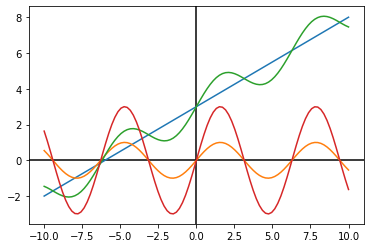

In [183]:
plot([f,g,f+g,3*g], -10,10)

**MINI-PROJECT:** Testing equality of functions is difficult. Do your best to write a function to test whether two functions are equal.

In [184]:
def approx_equal_function(f,g):
    results = []
    for _ in range(0,10):
        x = uniform(-10,10)
        results.append(isclose(f(x),g(x)))
    return all(results)

In [185]:
approx_equal_function(lambda x: (x*x)/x, lambda x: x)

True

**MINI-PROJECT:** Unit test your Function class to demonstrate that functions satisfy the vector space properties.

In [186]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
    def _repr_latex_(self):
        monomials = [repr(coefficient) if power == 0 
                               else "x ^ {%d}" % power if coefficient == 1
                               else "%s x ^ {%d}" % (coefficient,power) 
                               for (power,coefficient) in enumerate(self.coefficients) 
                               if coefficient != 0]
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

def random_function():
    degree = randint(0,5)
    p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
    return Function(lambda x: p(x))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_function(), random_function(), random_function()
    test(Function.zero(), approx_equal_function, a,b,u,v,w)

**MINI-PROJECT:**

In [187]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function(lambda x,y: self.function(x,y) + other.function(x,y))
    def scale(self, scalar):
        return Function(lambda x,y: scalar * self.function(x,y))
    @classmethod
    def zero(cls):
        return Function(lambda x,y: 0)
    def __call__(self, *args):
        return self.function(*args)    

In [188]:
f = Function(lambda x,y:x+y)
g = Function(lambda x,y: x-y+1)
(f+g)(3,10)

7

**MINI-PROJECT:**

In [189]:
class Matrix(Vector):
    @abstractproperty
    def rows(self):
        pass
    @abstractproperty
    def columns(self):
        pass
    def __init__(self, entries):
        self.entries = entries
    def add(self,other):
        return self.__class__(
            tuple(
                tuple(self.entries[i][j] + other.entries[i][j]
                      for j in range(0,self.columns()))
                for i in range(0,self.rows())
            )
        )
    def scale(self,scalar):
        return self.__class__(
            tuple(
                tuple(scalar * e for e in row)
                for row in self.entries
            )
        )
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)
    def zero(self):
        return self.__class__(
            tuple(
                tuple(0 for i in range(0,self.columns()))
                for j in range(0,self.rows())
            )
        )

In [190]:
class Matrix2_by_2(Matrix):
    def rows(self):
        return 2
    def columns(sefl):
        return 2

In [191]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

In [192]:
def random_matrix(rows, columns):
    return tuple(
        tuple(uniform(-10,10) for j in range(0,columns))
        for i in range(0,rows)
    )

def random_5_by_3():
    return Matrix5_by_3(random_matrix(5,3))
    
def approx_equal_matrix_5_by_3(m1,m2):
    return all([
        isclose(m1.matrix[i][j],m2.matrix[i][j]) 
        for j in range(0,3)
        for i in range(0,5)
    ])
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_5_by_3(), random_5_by_3(), random_5_by_3()
    test(Matrix5_by_3.zero(), approx_equal_matrix_5_by_3, a,b,u,v,w)

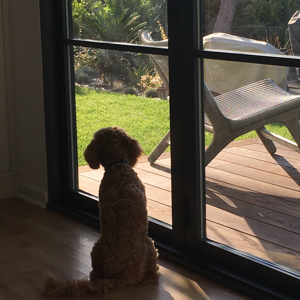

In [193]:
ImageVector("inside.JPG")

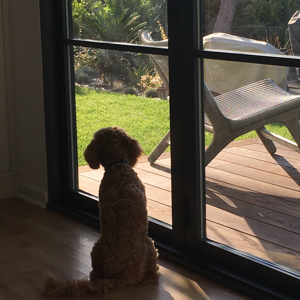

In [194]:
ImageVector("inside.JPG")+ImageVector.zero()

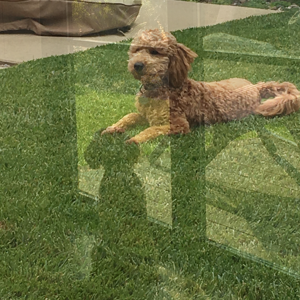

In [195]:
s = 0.3 #,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
s * ImageVector("inside.JPG") + (1-s) * ImageVector("outside.JPG")

In [196]:
linear_combos = [s * ImageVector("inside.JPG") + (1-s) * ImageVector("outside.JPG")
                 for s in [0.1*i for i in range(0,11)]]

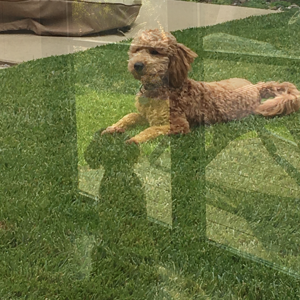

In [197]:
# e.g.
linear_combos[3]

In [198]:
def random_image():
    return ImageVector([(randint(0,255), randint(0,255),randint(0,255))
                        for i in range(0,200 * 200)])

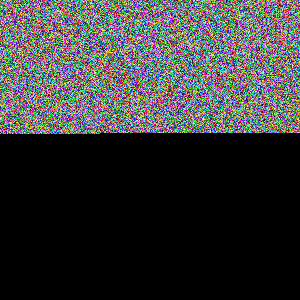

In [199]:
random_image()

In [200]:
def approx_equal_image(i1,i2):
    return all([isclose(c1,c2)
                for p1,p2 in zip(i1.pixels, i2.pixels)
                for c1,c2 in zip(p1,p2)])
    

In [201]:
# takes a while to run, but succeeds

# for i in range(0,100):
#     a,b = random_scalar(), random_scalar()
#     u,v,w = random_image(), random_image(), random_image()
#     test(ImageVector.zero(), approx_equal_image, a,b,u,v,w)

## 6.3 Looking for smaller vector spaces

### 6.3.1 Identifying subspaces

### 6.3.2 Starting with a single vector

### 6.3.3 Spanning a bigger space

### 6.3.4 Defining the word "dimension"

### 6.3.5 Finding subspaces of the vector space of functions

In [202]:
class LinearFunction(Vector):
    def __init__(self,a,b):
        self.a = a
        self.b = b
    def add(self,v):
        return LinearFunction(self.a + v.a, self.b + v.b)
    def scale(self, scalar):
        return LinearFunction(scalar * self.a, scalar * self.b)
    def __call__(self,x):
        return self.a * x + self.b
    @classmethod
    def zero(cls):
        return LinearFunction(0,0,0)

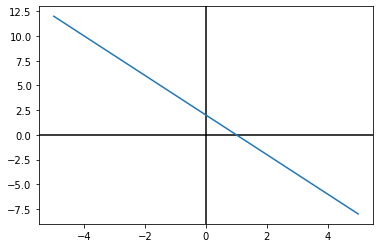

In [203]:
plot([LinearFunction(-2,2)], -5, 5)

### 6.3.6 Subspaces of images

In [204]:
gray = ImageVector([(1,1,1) for _ in range(0,300*300)])

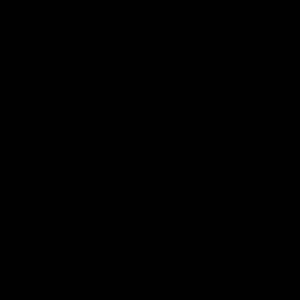

In [205]:
gray

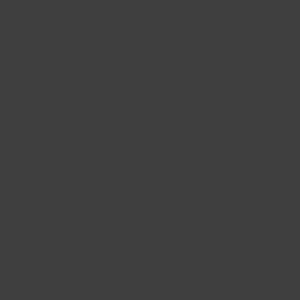

In [206]:
63*gray

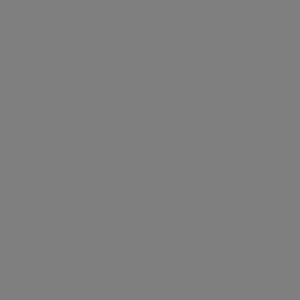

In [207]:
127*gray

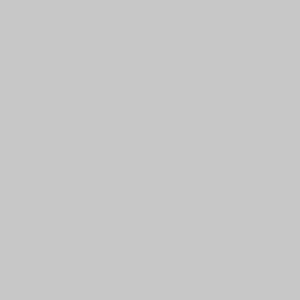

In [208]:
199*gray

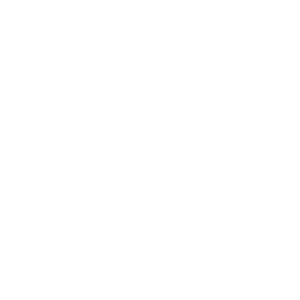

In [209]:
255*gray

### 6.3.7 Exercises

In [210]:
class LinearFunction(Vec2):
    def __call__(self, input):
        return self.x * input + self.y
        

In [211]:
class QuadraticFunction(Vector):
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    def add(self,v):
        return QuadraticFunction(self.a + v.a, self.b + v.b, self.c + v.c)
    def scale(self,scalar):
        return QuadraticFunction(scalar * self.a, scalar * self.b, scalar * self.c)
    def __call__(self,x):
        return self.a * x * x + self.b * x + self.c
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

In [212]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self, p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self, scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

In [213]:
def solid_color(r,g,b):
    return ImageVector([(r,g,b) for _ in range(0,300*300)])

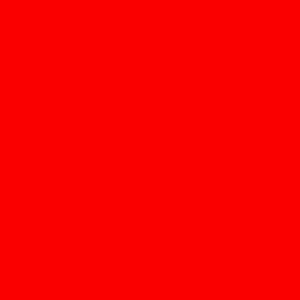

In [214]:
solid_color(250,0,0)

In [215]:
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30 #<1>
square_width = 10

def ij(n):
    return (n // image_size[0], n % image_size[1])

def to_lowres_grayscale(img): #<2>

    matrix = [
        [0 for i in range(0,square_count)]
        for j in range(0,square_count)
    ]
    for (n,p) in enumerate(img.pixels):
        i,j = ij(n)
        weight = 1.0 / (3 * square_width * square_width)
        matrix[i // square_width][ j // square_width] += (sum(p) * weight)
    return matrix

def from_lowres_grayscale(matrix): #<3>
    def lowres(pixels, ij):
        i,j = ij
        return pixels[i // square_width][ j // square_width]
    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x,x,x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
    return make_highres(matrix)


In [216]:
v = ImageVector("melba_toy.JPG")

In [217]:
# a 30x30 list of numbers
lowres = to_lowres_grayscale(v)
from_lowres_grayscale(lowres)

TypeError: unsupported operand type(s) for +: 'int' and 'str'